# Introduction to Sci-Kit Learn and Clustering

In this tutorial we will introduce the Sci-Kit Learn library:https://scikit-learn.org/stable/

This is a very important library with a huge toolkit for data processing, unsupervised and supervised learning. It is one of the core tools for data science.

We will see some of the capabilities of this toolkit and focus on clustering.

In [1]:
import numpy as np
import scipy as sp
import scipy.sparse as sp_sparse
import scipy.spatial.distance as sp_dist

import matplotlib.pyplot as plt

import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing
import sklearn.cluster as sk_cluster
import sklearn.feature_extraction.text as sk_text


import scipy.cluster.hierarchy as hr

import time
import seaborn as sns

%matplotlib inline

## Computing distances

For the computation of distances there are libraries in Scipy

http://docs.scipy.org/doc/scipy-0.15.1/reference/spatial.distance.html#module-scipy.spatial.distance

but also in SciKit metrics library:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html

Most of these work with sparse data as well.


### Compute distances using scipy 

Computing distances between vectors

In [16]:
import scipy.spatial.distance as sp_dist

x = np.random.randint(2, size = 5)
y = np.random.randint(2, size = 5)
print (x)
print (y)
print (sp_dist.cosine(x,y))
print (sp_dist.euclidean(x,y))
print (sp_dist.jaccard(x,y))
print (sp_dist.hamming(x,y))
# When computing jaccard similarity of 0/1 matrices, 
# 1 means that the element corresponding to the column is in the set,
# 0 that the element is not in the set

[0 0 0 0 1]
[0 1 0 1 1]
0.42264973081037416
1.4142135623730951
0.6666666666666666
0.4


Compute pairwise distances in a table using **pdist** of scipy. 

When given a matrix, it computes all pairwise distances between its rows. The output is a vector with N(N-1)/2 entries (N number of rows). We can transform it into an NxN distance matrix using **squareform**.

In [18]:
A = np.random.randint(2, size = (5,3))

# computes the matrix of all pairwise distances of rows
# returns a vector with N(N-1)/2 entries (N number of rows)
D = sp_dist.pdist(A, 'jaccard') 
print (A)
print('\n all row distances')
print (D)
print(sp_dist.squareform(D))

[[1 0 1]
 [0 1 1]
 [0 0 0]
 [0 0 1]
 [1 0 0]]

 all row distances
[0.66666667 1.         0.5        0.5        1.         0.5
 1.         1.         1.         1.        ]
[[0.         0.66666667 1.         0.5        0.5       ]
 [0.66666667 0.         1.         0.5        1.        ]
 [1.         1.         0.         1.         1.        ]
 [0.5        0.5        1.         0.         1.        ]
 [0.5        1.         1.         1.         0.        ]]


We can compute all pairwise distances between the rows of two tables A and B, using the **cdist** function of scipy. If A has N rows and B has M rows the result is an NxM matrix with all the distances

In [19]:
x = x.reshape(1,5)
y = y.reshape(1,5)
sp_dist.cdist(x,y,'cosine')

array([[0.42264973]])

In [20]:
B = np.random.randint(2, size = (3,3))
print(A)
print(B)
D = sp_dist.cdist(A,B,'jaccard')
print(D)

[[1 0 1]
 [0 1 1]
 [0 0 0]
 [0 0 1]
 [1 0 0]]
[[0 0 1]
 [1 1 0]
 [0 1 0]]
[[0.5        0.66666667 1.        ]
 [0.5        0.66666667 0.5       ]
 [1.         1.         1.        ]
 [0.         1.         1.        ]
 [1.         0.5        1.        ]]


### Compute distances using sklearn

In [21]:
import sklearn.metrics as metrics

#computes the matrix of all pairwise distances of rows
# returns a NxN matrix (N number of rows)
print(A)
D2 = metrics.pairwise_distances(A,metric = 'jaccard') 
print('\n the matrix of row distances')
print(D2)

[[1 0 1]
 [0 1 1]
 [0 0 0]
 [0 0 1]
 [1 0 0]]

 the matrix of row distances
[[0.         0.66666667 1.         0.5        0.5       ]
 [0.66666667 0.         1.         0.5        1.        ]
 [1.         1.         0.         1.         1.        ]
 [0.5        0.5        1.         0.         1.        ]
 [0.5        1.         1.         1.         0.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Some similarity and distance metrics are directly computed in the pairwise library:
    
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

In [22]:
C = metrics.pairwise.cosine_similarity(A)
print('Cosine Similarity')
print(C)

Cosine Similarity
[[1.         0.5        0.         0.70710678 0.70710678]
 [0.5        1.         0.         0.70710678 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.70710678 0.70710678 0.         1.         0.        ]
 [0.70710678 0.         0.         0.         1.        ]]


Compute distances between the rows of two tables

In [23]:
print(A)
print (B)

#computes the matrix of all pairwise distances of rows of A with rows of B
# returns an NxM matrix (N rows of A, M rows of B)
D3 = metrics.pairwise_distances(A,B,metric = 'jaccard') 
print('\n the matrix of distances between the rows of A and B')
print(D3)

[[1 0 1]
 [0 1 1]
 [0 0 0]
 [0 0 1]
 [1 0 0]]
[[0 0 1]
 [1 1 0]
 [0 1 0]]

 the matrix of distances between the rows of A and B
[[0.5        0.66666667 1.        ]
 [0.5        0.66666667 0.5       ]
 [1.         1.         1.        ]
 [0.         1.         1.        ]
 [1.         0.5        1.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1870: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


We can apply everything to sparce matrices

In [24]:
d = np.array([[0, 0, 12],
              [0, 1, 1],
              [0, 5, 34],
              [1, 3, 12],
              [1, 2, 6],
              [2, 0, 23],
              [3, 4, 14],
              ])
s = sp_sparse.csr_matrix((d[:,2],(d[:,0],d[:,1])), shape=(4,6))
D4 = metrics.pairwise.pairwise_distances(s,metric = 'euclidean')
print(s.toarray())
print(D4)

[[12  1  0  0  0 34]
 [ 0  0  6 12  0  0]
 [23  0  0  0  0  0]
 [ 0  0  0  0 14  0]]
[[ 0.         38.48376281 35.74912586 38.69108424]
 [38.48376281  0.         26.62705391 19.39071943]
 [35.74912586 26.62705391  0.         26.92582404]
 [38.69108424 19.39071943 26.92582404  0.        ]]


In [25]:
v = np.random.randint(2, size = 6)
v = v.reshape(1,6)
print(v)
metrics.pairwise.pairwise_distances(v,s,metric = 'euclidean')

[[1 0 1 0 1 1]]


array([[34.82814953, 13.11487705, 22.06807649, 13.11487705]])

## Clustering

You can read more about clustering in SciKit here:

http://scikit-learn.org/stable/modules/clustering.html

Generate data from Gaussian distributions. 

More on data generation here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

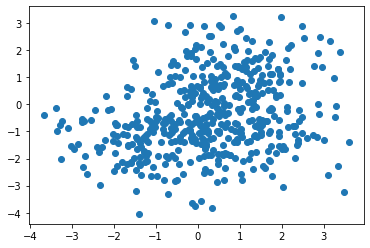

In [26]:
centers = [[1,1], [-1, -1], [1, -1]]
X, true_labels = sk_data.make_blobs(n_samples=500, centers=centers, n_features=2,
                                    center_box=(-10.0, 10.0),random_state=0)
plt.scatter(X[:,0], X[:,1])

In [27]:
print(type(X))
print(true_labels)
print(len(true_labels[true_labels==0]),len(true_labels[true_labels==1]),len(true_labels[true_labels==2]))

<class 'numpy.ndarray'>
[2 0 1 1 0 1 1 2 2 2 1 0 0 1 1 0 0 2 2 0 0 0 2 2 0 1 0 2 0 2 0 0 0 2 1 1 0
 0 2 2 0 2 1 0 2 2 0 0 1 2 2 0 0 1 0 2 1 1 1 2 2 1 0 0 2 1 1 2 2 2 2 1 2 0
 0 0 2 2 0 0 0 0 0 2 1 2 2 0 0 2 2 1 0 2 1 0 1 2 1 1 2 2 1 2 1 0 1 1 0 2 2
 2 0 2 0 2 2 0 1 1 0 1 2 1 1 2 2 1 2 0 0 0 1 2 2 0 2 0 2 1 2 1 0 0 1 0 2 1
 0 1 2 2 2 0 1 0 1 0 2 2 0 1 0 0 1 2 1 1 1 2 1 2 1 0 1 0 2 2 0 2 1 0 2 2 0
 1 2 0 0 2 1 2 2 2 0 2 2 1 2 1 0 2 1 2 1 2 0 0 0 1 2 0 0 2 1 1 2 2 0 1 2 0
 0 1 1 1 0 2 2 2 1 2 1 1 1 0 1 2 0 2 1 2 0 2 1 1 2 2 1 2 0 0 1 0 1 0 2 1 2
 1 1 1 1 0 0 1 0 1 1 1 1 2 1 0 0 0 0 2 1 2 2 0 0 1 0 2 1 0 2 2 1 0 0 1 0 2
 1 2 1 0 0 0 1 2 0 0 2 2 1 0 0 1 1 0 2 1 0 1 2 1 1 0 2 0 2 1 2 1 0 0 0 1 0
 2 2 1 0 2 2 2 0 1 1 1 0 1 0 0 0 2 0 2 0 2 2 0 2 2 2 2 1 1 1 2 2 2 2 0 0 0
 1 2 0 1 0 1 0 1 2 2 0 2 1 0 1 2 2 0 1 2 1 2 0 0 0 1 2 0 0 1 2 2 0 2 1 0 2
 0 1 0 2 0 0 1 0 0 0 0 1 0 2 2 2 1 0 1 2 1 2 1 0 1 1 1 1 1 0 2 1 2 0 0 1 2
 0 2 1 0 0 1 1 2 1 2 1 1 1 1 2 0 1 1 0 1 2 0 1 1 0 2 0 0 1 1 1 0 1 0 1 1 1
 

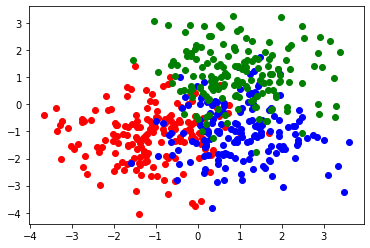

In [28]:
plt.scatter(X[true_labels==1,0], X[true_labels==1,1],c = 'r')
plt.scatter(X[true_labels==2,0], X[true_labels==2,1],c = 'b')
plt.scatter(X[true_labels==0,0], X[true_labels==0,1],c = 'g')

Useful command: We will create a colormap of the distance matrix using the [<tt>pcolormesh</tt>](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html) method of matplotlib.pyplot

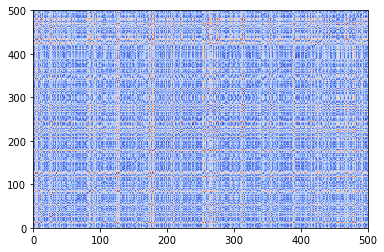

In [29]:
euclidean_dists = metrics.euclidean_distances(X)
plt.pcolormesh(euclidean_dists,cmap=plt.cm.coolwarm)

## Clustering Algorithms

scikit-learn has a huge set of tools for unsupervised learning generally, and clustering specifically.
These are in sklearn.cluster. http://scikit-learn.org/stable/modules/clustering.html

There are 3 functions in all the clustering classes,
<ul>
<li> fit(): builds the model from the training data (e.g. for kmeans, it finds the centroids) 
<li> predict(): assigns labels to the data after building the model
<li> fit_predict(): does both at the same data (e.g in kmeans, it finds the centroids and assigns the labels to the dataset)
</ul>

### K-means clustering ###

More on the k-means clustering here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Important parameters 

<tt>init</tt>: determines the way the initialization is done. kmeans++ is the default.

<tt>n_init</tt>: number of random initializations

<tt>max_iter</tt>: maximum number of iterations, 

Important attributes:

<tt>labels_</tt> the labels for each point

<tt>cluster_centers_</tt>: the cluster centroids

<tt>inertia_</tt>: the SSE value

In [30]:
import sklearn.cluster as sk_cluster

kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=3, max_iter=100)
kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_

print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print(kmeans_labels)
print ('\n Cluster Centroids')
print (centroids)

The total error of the clustering is:  729.3882206069677

Cluster labels
[1 1 1 0 2 0 0 1 1 1 0 2 2 0 0 2 2 2 0 1 2 2 1 2 2 0 2 0 2 1 1 2 2 1 0 0 2
 2 1 1 2 1 0 2 1 1 2 2 1 1 0 2 2 0 2 2 0 0 2 2 1 0 2 2 2 0 0 0 1 1 2 0 1 2
 1 2 0 1 2 2 2 2 2 1 0 1 2 2 2 1 0 0 2 1 1 1 0 1 2 0 2 1 1 1 0 2 0 0 2 1 1
 1 2 1 1 1 1 2 0 0 2 0 1 0 0 1 1 0 1 2 2 2 0 1 1 2 1 2 1 1 1 0 1 1 0 2 1 1
 2 0 2 1 1 2 0 2 0 1 2 1 2 1 1 2 0 1 0 0 0 1 1 1 0 2 0 2 0 1 2 1 0 2 2 1 2
 0 1 2 2 2 0 1 1 1 2 1 1 0 1 0 2 1 0 1 0 1 2 2 2 0 1 2 2 0 2 0 1 1 2 0 1 2
 2 0 0 2 2 1 2 1 0 1 0 2 0 2 0 2 2 2 0 1 2 1 0 1 1 2 0 1 2 1 0 2 0 2 1 0 1
 0 0 0 1 2 2 2 2 0 0 2 0 1 0 2 2 2 2 1 0 1 1 2 2 0 2 1 0 2 0 1 0 1 2 0 2 2
 0 1 0 2 2 2 0 1 2 2 2 1 0 1 2 0 0 2 1 0 2 0 2 1 0 2 1 2 1 0 2 1 2 2 2 0 2
 2 1 0 1 1 1 1 2 0 0 0 1 2 2 2 2 1 2 0 1 1 0 2 2 1 0 0 0 1 0 2 1 1 1 2 2 2
 1 2 2 0 2 0 1 2 0 1 2 1 0 2 0 1 1 2 0 1 0 1 2 1 2 0 1 2 2 0 1 1 2 1 0 2 1
 1 0 0 2 2 2 0 2 2 2 2 1 2 2 1 1 0 2 1 1 1 1 0 2 0 0 1 0 0 2 0 0 1 2 2 0 1
 2 1 0 2 1 1 0 1 0 1 0 0 0 

Useful command: <tt>numpy.argsort</tt> sorts a set of values and returns the sorted indices

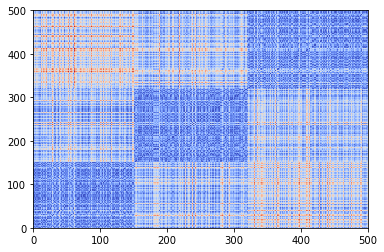

In [31]:
idx = np.argsort(kmeans_labels) # returns the indices in sorted order
rX = X[idx,:]
r_euclid = metrics.euclidean_distances(rX)
#r_euclid = euclidean_dists[idx,:][:,idx]
plt.pcolormesh(r_euclid,cmap=plt.cm.coolwarm)

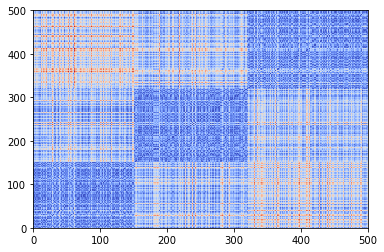

In [32]:
se = euclidean_dists[idx,:]
se = se[:,idx]
plt.pcolormesh(se,cmap=plt.cm.coolwarm)

## Evaluation

### Confusion matrix ###

Confusion matrix: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

[[  1 135  15]
 [ 26  20 122]
 [140  12  29]]


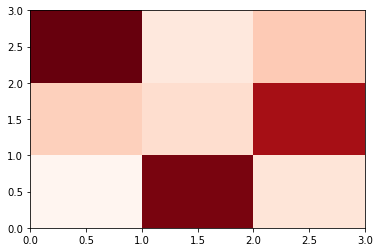

In [33]:
C= metrics.confusion_matrix(kmeans_labels,true_labels)
print (C)
plt.pcolormesh(C,cmap=plt.cm.Reds)

Important: In the produced confusion matrix, the first list defines the rows and the second the columns. The matrix is always square, regarless if the number of classes and clusters are not the same. The extra rows or columns are filled with zeros.

### Precision and recall 


Precision: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

Recall: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

These metrics are for classification, so they assume that row i is mapped to column i

In [34]:
p = metrics.precision_score(true_labels,kmeans_labels, average=None)
print(p)
r = metrics.recall_score(true_labels,kmeans_labels, average = None)
print(r)

[0.00662252 0.11904762 0.16022099]
[0.00598802 0.11976048 0.1746988 ]


Create a function that maps each cluster to the class that has the most points.

You need to be careful if many clusters map to the same class. It will not work in this case

Useful command: <tt>numpy.argmax</tt> returns the index of the max element

[[140  12  29]
 [  1 135  15]
 [ 26  20 122]]


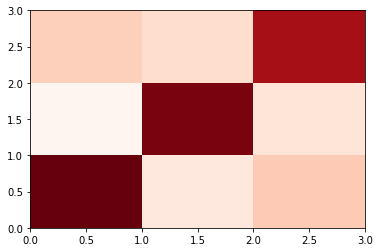

In [35]:
def cluster_class_mapping(kmeans_labels,true_labels):
    C= metrics.confusion_matrix(kmeans_labels,true_labels)
    mapping = list(np.argmax(C,axis=1)) #for each row (cluster) find the best class in the confusion matrix
    mapped_kmeans_labels = [mapping[l] for l in kmeans_labels]
    C2= metrics.confusion_matrix(mapped_kmeans_labels,true_labels)
    return mapped_kmeans_labels,C2

mapped_kmeans_labels,C = cluster_class_mapping(kmeans_labels,true_labels)
print(C)
plt.pcolormesh(C, cmap=plt.cm.Reds)

Compute different metrics for clustering quality

In [36]:
p = metrics.precision_score(true_labels,mapped_kmeans_labels, average=None)
print(p)
r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = None)
print(r)
f = metrics.f1_score(true_labels,mapped_kmeans_labels, average = None)
print(f)
p = metrics.precision_score(true_labels,mapped_kmeans_labels, average='weighted')
print(p)
r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = 'weighted')
print(r)
f = metrics.f1_score(true_labels,mapped_kmeans_labels, average = 'weighted')
print(f)

[0.77348066 0.89403974 0.72619048]
[0.83832335 0.80838323 0.73493976]
[0.8045977  0.8490566  0.73053892]
0.7980470510548809
0.794
0.794859459999974


### Homogeneity and completeness

http://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness

Homogeneity and completeness are computed using the conditional entropy of the labels given the cluster, and the conditional entropy of the cluster labels given the class label. The V-measure combines these in a similar way like F-measure

In [37]:
h = metrics.homogeneity_score(true_labels,mapped_kmeans_labels)
print(h)
c = metrics.completeness_score(true_labels,mapped_kmeans_labels)
print(c)
v = metrics.v_measure_score(true_labels,mapped_kmeans_labels)
print(v)

0.44199547480098583
0.4430951461741084
0.44254462735008065


### Silhouette score 

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

Create the silhouette plot, plotting the silhouette score against k

We see a peak at k = 3 and k = 6 indicating that these may be good values for the cluster number

The SSE plot

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'Error')

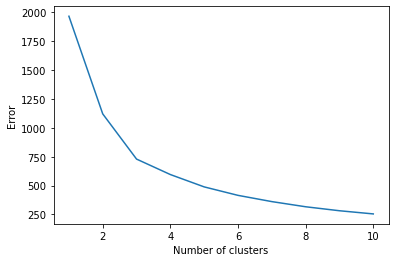

In [41]:
error = np.zeros(11)
sh_score = np.zeros(11)
for k in range(1,11):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_
    if k>1: sh_score[k]= metrics.silhouette_score(X, kmeans.labels_)

plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

The silhouette plot

Text(0, 0.5, 'silhouette score')

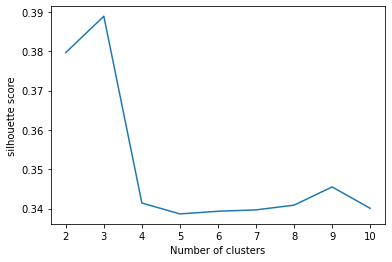

In [42]:
plt.plot(range(2,len(sh_score)),sh_score[2:])
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')

Plot of silhouette and SSE together in a plot with two different y axes. The red (left) is the silhouette score and the blue (right) is the SSE score. We can now study the two lines together.

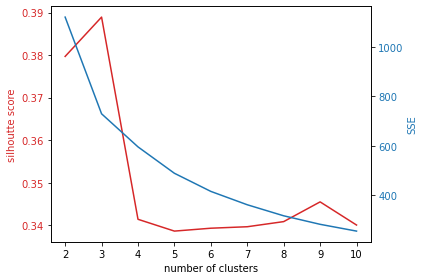

In [43]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhoutte score', color=color)
ax1.plot(range(2,len(sh_score)),sh_score[2:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SSE', color=color)  # we already handled the x-label with ax1
ax2.plot(range(2,len(error)),error[2:], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

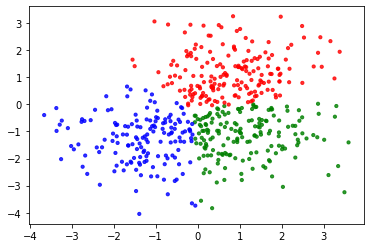

In [44]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[kmeans_labels].tolist(), s=10, alpha=0.8)

### Agglomerative Clustering

More on Agglomerative Clustering here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

[[ 33 156 108]
 [126  10  16]
 [  8   1  42]]
[[126  10  16]
 [ 33 156 108]
 [  8   1  42]]
0.7257145291928573
0.648


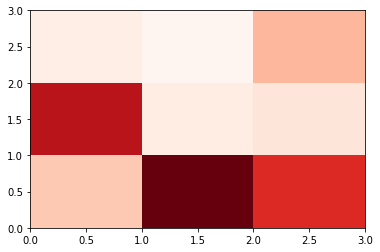

In [45]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 3)
agglo_labels = agglo.fit_predict(X)

C_agglo= metrics.confusion_matrix(agglo_labels,true_labels)
print (C_agglo)
#plt.pcolor(C_agglo,cmap=plt.cm.coolwarm)
plt.pcolormesh(C_agglo,cmap=plt.cm.Reds)

mapped_agglo_labels,C_agglo = cluster_class_mapping(agglo_labels,true_labels)
print(C_agglo)
p = metrics.precision_score(true_labels,mapped_agglo_labels, average='weighted')
print(p)
r = metrics.recall_score(true_labels,mapped_agglo_labels, average = 'weighted')
print(r)

Another way to do agglomerative clustering using SciPy:
    
https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

In [46]:
import scipy.cluster.hierarchy as hr

Z = hr.linkage(X, method='complete', metric='euclidean')

print (Z.shape, X.shape)

(499, 4) (500, 2)


In [47]:
import scipy.spatial.distance as sp_dist
D = sp_dist.pdist(X, 'euclidean') 
Z = hr.linkage(D, method='complete')
print (Z.shape, X.shape)

(499, 4) (500, 2)


Hierarchical clustering returns a 4 by (n-1) matrix Z. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the n original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


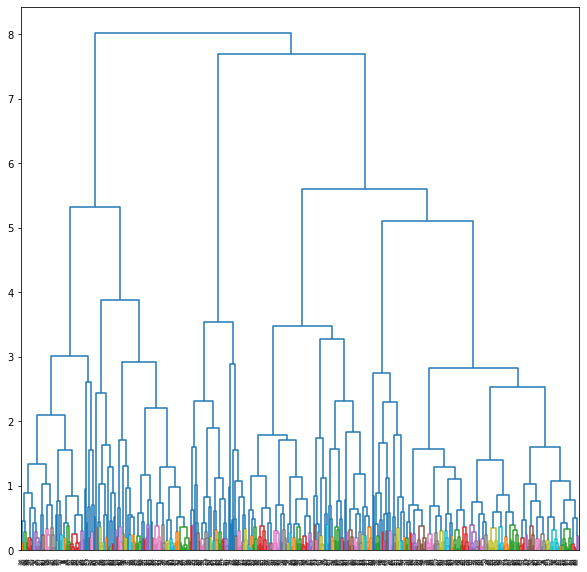

In [48]:
fig = plt.figure(figsize=(10,10))
T = hr.dendrogram(Z,color_threshold=0.4, leaf_font_size=4)
fig.show()

Another way to do agglomerative clustering (and visualizing it):
http://seaborn.pydata.org/generated/seaborn.clustermap.html

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:531: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


[177, 469, 83, 179, 343, 61, 34, 124, 3, 466, 252, 490, 442, 312, 354, 230, 240, 476, 302, 57, 317, 154, 438, 167, 71, 472, 232, 399, 450, 35, 236, 454, 172, 478, 219, 107, 320, 455, 283, 434, 244, 426, 425, 121, 123, 25, 335, 432, 254, 6, 174, 127, 388, 423, 267, 53, 435, 257, 197, 209, 481, 415, 491, 264, 206, 294, 181, 411, 275, 12, 117, 208, 226, 187, 332, 444, 238, 274, 263, 310, 75, 355, 374, 4, 424, 465, 95, 114, 142, 309, 281, 129, 468, 471, 80, 250, 200, 266, 419, 235, 436, 383, 194, 462, 28, 160, 441, 301, 412, 40, 11, 173, 242, 380, 100, 350, 221, 330, 392, 410, 36, 499, 287, 394, 88, 31, 54, 43, 155, 182, 347, 20, 222, 295, 369, 32, 15, 188, 440, 326, 316, 447, 24, 82, 137, 92, 480, 168, 223, 431, 382, 484, 492, 52, 345, 363, 58, 300, 47, 78, 51, 387, 356, 145, 207, 346, 416, 62, 329, 37, 305, 98, 321, 153, 178, 247, 348, 306, 417, 112, 148, 163, 405, 367, 81, 255, 323, 304, 131, 313, 135, 218, 402, 120, 16, 482, 63, 205, 333, 474, 443, 231, 1, 403, 150, 108, 397, 45, 19, 3

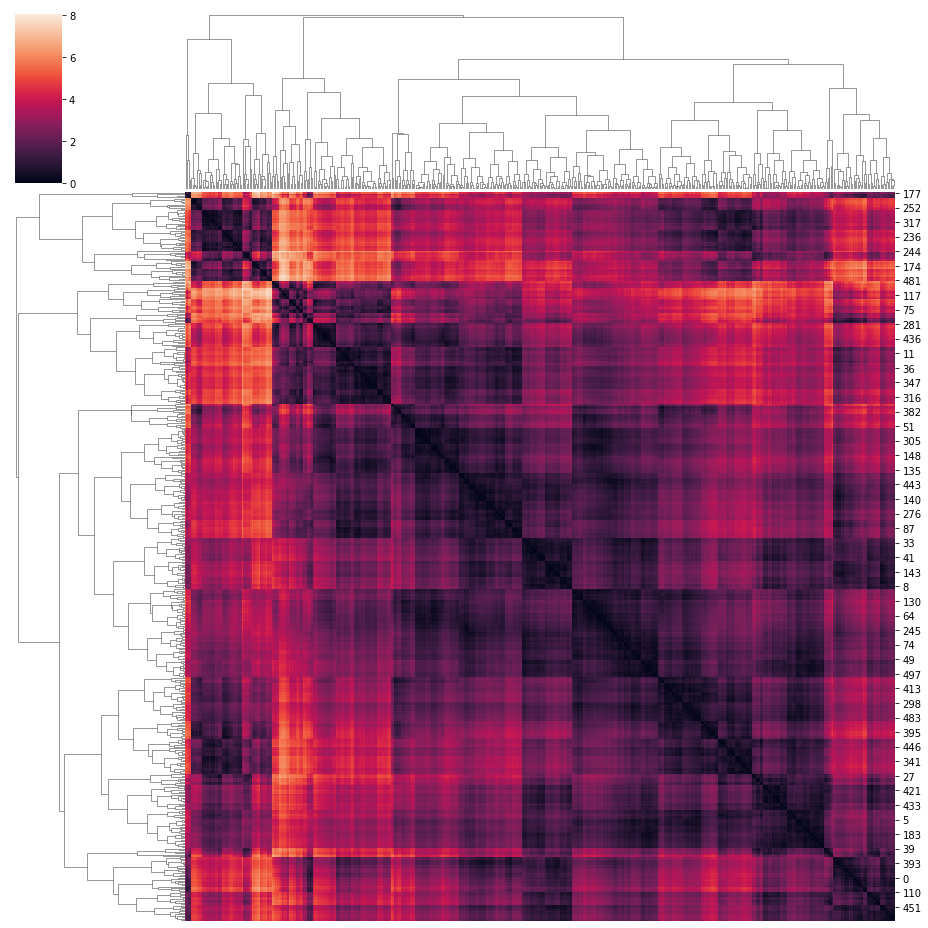

In [49]:
distances = metrics.euclidean_distances(X)
cg = sns.clustermap(distances, method="complete", figsize=(13,13), xticklabels=False)
print (cg.dendrogram_col.reordered_ind)

### DBSCAN Algorithm ###

More on DBSCAN here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [50]:
dbscan = sk_cluster.DBSCAN(eps=0.3)
dbscan_labels = dbscan.fit_predict(X)
print(dbscan_labels) #label -1 corresponds to noise
renamed_dbscan_labels = [x+1 for x in dbscan_labels]
C = metrics.confusion_matrix(renamed_dbscan_labels,true_labels)
#print(C)
print (C[:,:max(true_labels)+1])

[ 5  0  0 -1 -1  0 -1  0  0  3  0  0 -1 -1  0 -1  0  0  0  0  0  0  5  0
  0 -1  0 -1 -1  0  0  0 -1  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1
  0  0  0 -1  1 -1  0  0  0  0  1  0  0 -1  0  0  0  0  0  0  0  0  0 -1
  0  0  0 -1  0  0 -1  0  2  0  0 -1  0  3  0  0  0 -1  0  0 -1  0  0 -1
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0 -1  0  0
  0 -1  0 -1 -1  3  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  4  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0 -1  1  0  0  0 -1
 -1  3  0 -1 -1  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0 -1 -1  0 -1  0
  0  0  0  0  0 -1  0  0  2  0  0 -1  0  0 -1  0 -1 -1 -1  0  0  0  0 -1
  0 -1  0  0  0 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0  2  0  0 -1  0
  0  5  0  0 -1  0  0  0  0  0  2  0 -1  0 -1  0 -1 -1  0  0  0  0  0 -1
 -1  0  2 -1  0  0  0  5  0  0 -1 -1  0  0  0  0 -1 -1  0  0  0 -1  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  1  0  0 -1  0  0  0  0  0 -1 -1  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0

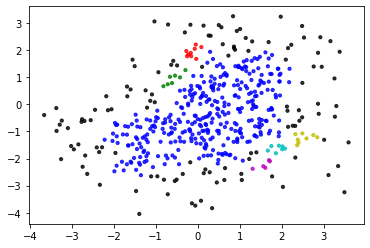

In [51]:
#colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
#colors = np.hstack([colors] * 20)
colors = np.array([x for x in 'bgrcmywk'*10])
plt.scatter(X[:, 0], X[:, 1], color=colors[dbscan_labels].tolist(), s=10, alpha=0.8)

## Clustering text data

An example of what we want to do:
http://scikit-learn.org/stable/auto_examples/text/document_clustering.html

SciKit datasets: http://scikit-learn.org/stable/datasets/

We will use the 20-newsgroups datasets which consists of postings on 20 different newsgroups. 

More information here: http://scikit-learn.org/stable/datasets/#the-20-newsgroups-text-dataset 


In [52]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.os.ms-windows.misc', 'sci.space','rec.sport.baseball']
#categories = ['alt.atheism', 'sci.space','rec.sport.baseball']
news_data = sk_data.fetch_20newsgroups(subset='train', 
                               remove=('headers', 'footers', 'quotes'),
                               categories=categories)
print (news_data.target)
print (len(news_data.target))

[2 0 0 ... 2 1 2]
1781


In [53]:
print (type(news_data))
print (news_data.filenames)
print (news_data.target[:10])
print (news_data.data[1])
print (len(news_data.data))

<class 'sklearn.utils.Bunch'>
['C:\\Users\\tsapa\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\60940'
 'C:\\Users\\tsapa\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.os.ms-windows.misc\\9955'
 'C:\\Users\\tsapa\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.os.ms-windows.misc\\9846'
 ...
 'C:\\Users\\tsapa\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\60891'
 'C:\\Users\\tsapa\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.sport.baseball\\104484'
 'C:\\Users\\tsapa\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\61110']
[2 0 0 2 0 0 1 2 2 1]
Recently the following problem has arrisen.  The first time I turn on my  
computer when windows starts (from my autoexec) after the win31 title screen  
the computer reboots on its own.  Usually the second time (after reboot) or  
from the DOS prompt everything works fine.

 s far as I remember I have not changed my config.sys or autoxec.bat or  
win.ini.  

In [54]:
vectorizer = sk_text.TfidfVectorizer(stop_words='english',
                             #max_features = 1000,
                             min_df=4, max_df=0.8)
data = vectorizer.fit_transform(news_data.data)
print(type(data))

<class 'scipy.sparse.csr.csr_matrix'>


In [55]:
import sklearn.cluster as sk_cluster
k=3
kmeans = sk_cluster.KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit_predict(data)

array([1, 1, 1, ..., 1, 1, 1])

To understand the clusters we can print the words that have the highest values in the centroid

In [56]:
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind])
    print

Top terms per cluster:
Cluster 0:
 comp
 linux
 os
 unix
 fortran
 free
 robust
 list
 chris
 utilities
Cluster 1:
 windows
 space
 like
 just
 know
 think
 don
 thanks
 year
 does
Cluster 2:
 ami
 compress
 pro
 loading
 running
 causes
 fault
 drive
 times
 hard


In [57]:
C = metrics.confusion_matrix(kmeans.labels_,news_data.target)

mapped_kmeans_labels,C = cluster_class_mapping(kmeans.labels_,news_data.target)
print (C)
p = metrics.precision_score(news_data.target,mapped_kmeans_labels, average=None)
print(p)
r = metrics.recall_score(news_data.target,mapped_kmeans_labels, average = None)
print(r)

[[  4   0   0]
 [587 597 593]
 [  0   0   0]]
[1.         0.33595948 0.        ]
[0.00676819 1.         0.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'complete', n_clusters = 3,)
dense = data.todense()
agglo_labels = agglo.fit_predict(dense) # agglomerative needs dense data

C_agglo= metrics.confusion_matrix(agglo_labels,news_data.target)
print (C_agglo)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


[[574 595 482]
 [ 17   0   2]
 [  0   2 109]]


In [59]:
dbscan = sk_cluster.DBSCAN(eps=0.1)
dbscan_labels = dbscan.fit_predict(data)
C = metrics.confusion_matrix(dbscan.labels_,news_data.target)
print (C)

[[  0 556 567 576]
 [  0   9   0   0]
 [  0  26  30  17]
 [  0   0   0   0]]
